In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
file_name = 'TP53 DLBCL 380 A80 cyto nons mut 1 toned.jpg'

image = cv2.imread(file_name)

In [19]:
def get_marker_color_i(img):
    b = np.sum(img[:,:,0])
    g = np.sum(img[:,:,1])
    r = np.sum(img[:,:,2])
    tot = b+g+r
    print(b/tot,g/tot,r/tot)

In [20]:
get_marker_color_i(image)

0.28091376221883946 0.32550891289638506 0.3935773248847755


In [63]:
ret, thresh = cv2.threshold(image[:,:,2],50,255, cv2.THRESH_BINARY_INV)
retval, label, stats, centroids = cv2.connectedComponentsWithStats(thresh)

In [95]:
image[:,:,0]

array([[ 51,  35,  31, ...,  23,  15,  23],
       [ 36,  24,  14, ...,  16,  15,  20],
       [ 43,  40,  22, ...,  41,  25,  20],
       ...,
       [253, 253, 252, ...,  79,  80, 104],
       [252, 252, 251, ..., 101,  95, 117],
       [252, 252, 250, ..., 122,  99, 122]], dtype=uint8)

In [102]:
r = np.sum(image[:,:,0])
g = np.sum(image[:,:,1])
b = np.sum(image[:,:,2])

In [104]:
r/(r+g+b),g/(r+g+b),b/(r+g+b)

(0.28091376221883946, 0.32550891289638506, 0.3935773248847755)

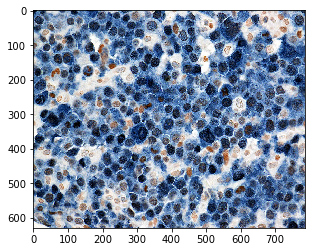

In [105]:
plt.imshow(image)

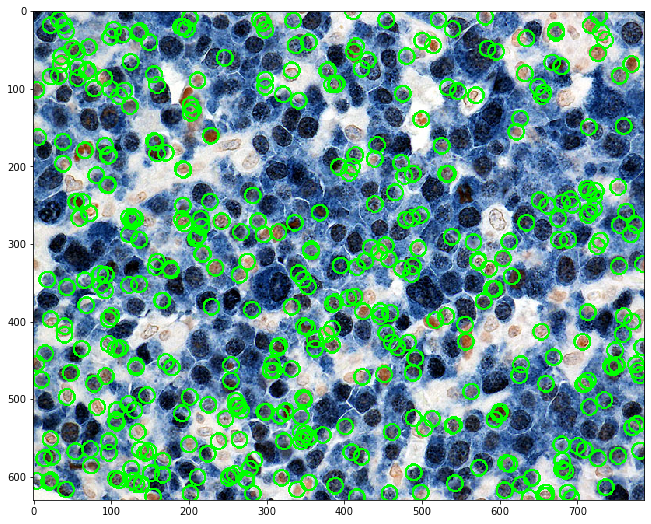

In [182]:
file_name = 'TP53 DLBCL 380 A80 cyto nons mut 1 toned.jpg'

image = cv2.imread(file_name)

t = cv2.inRange(image, (70,0,0),(255,150,150))
retval, label, stats, centroids = cv2.connectedComponentsWithStats(t)
cnt, heirarchy= cv2.findContours(t, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt_filtered = []

for c in cnt:
    area = cv2.contourArea(c)
    if area > 10:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        cv2.circle(image, (cX, cY), 10, (0, 255, 0), 2)

cnt_image = cv2.drawContours(image, cnt_filtered, -1, (255,0,0),1, 8)
fig,ax = plt.subplots()
fig.set_size_inches(12,9)
ax.imshow(cnt_image)
plt.show()


In [216]:
file_name = 'TP53 DLBCL 380 A80 cyto nons mut 1 toned.jpg'

image = cv2.imread(file_name)
im_cp = np.copy(image)
im_cp_labelled = np.copy(image)

for i in range(len(im_cp)):
    for j in range(len(im_cp[0])):
        r = im_cp[i][j][0]
        g = im_cp[i][j][1]
        b = im_cp[i][j][2]
        
        if b == 0 or float(r)/float(b) > 1.2:
            im_cp[i][j] = 255
        else:
            im_cp[i][j] = 0

ret, mask = cv2.threshold(im_cp,10,255, cv2.THRESH_BINARY)

cnt, heirarchy= cv2.findContours(cv2.cvtColor(im_cp, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt_filtered = []

for c in cnt:
    area = cv2.contourArea(c)
    if area > 5:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        cv2.circle(im_cp_labelled, (cX, cY), 10, (0, 255, 0), 2)

cv2.imwrite('TP53_DLBCL_380_A80_cyto_nons_mut_1_toned_labelled.jpg', im_cp_labelled)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(24,9)
ax[0].imshow(image)
ax[1].imshow(im_cp_labelled)

plt.show()

True

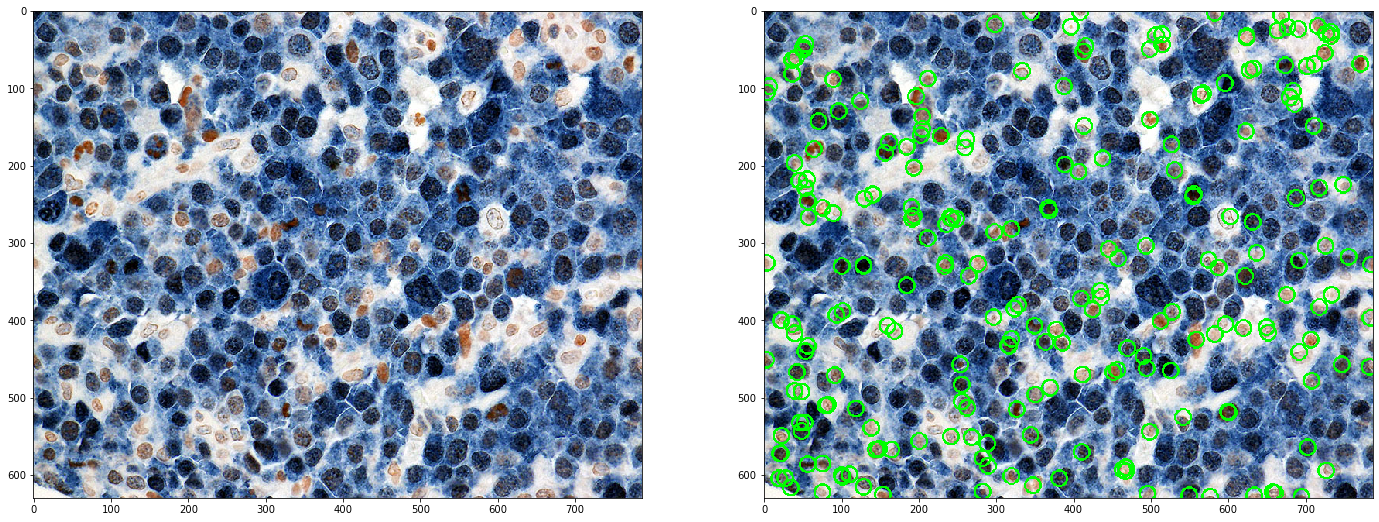

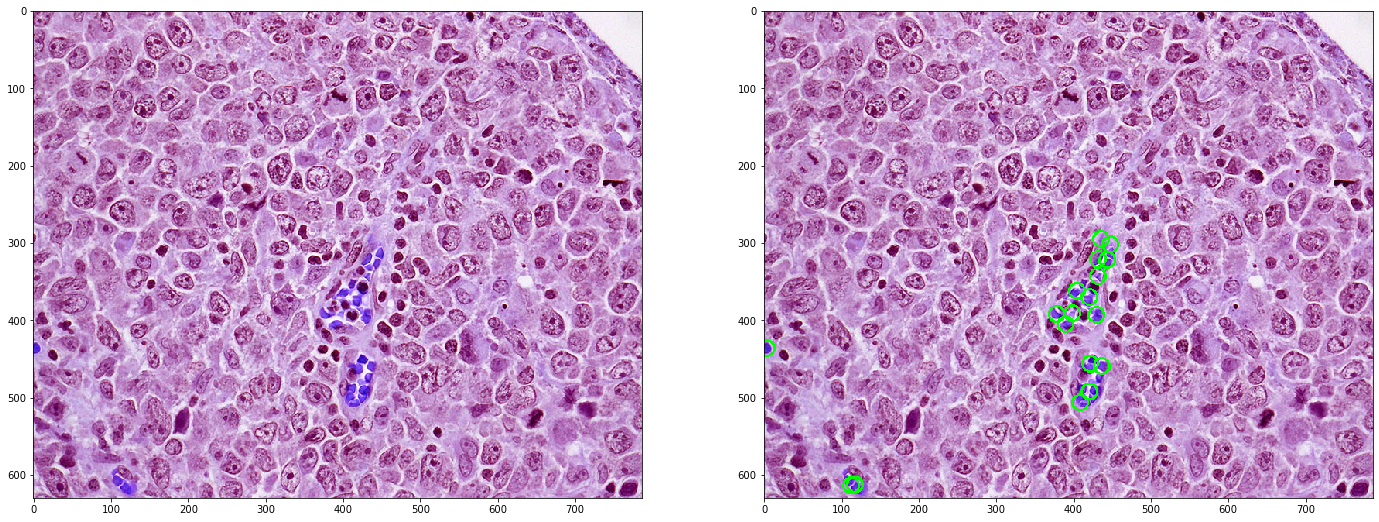

In [226]:
file_name = "TP53 DLBCL 380 C112 cyto miss he1.jpg"

image = cv2.imread(file_name)
im_cp = np.copy(image)
im_cp_labelled = np.copy(image)

for i in range(len(im_cp)):
    for j in range(len(im_cp[0])):
        r = im_cp[i][j][0]
        g = im_cp[i][j][1]
        b = im_cp[i][j][2]
        
        if r == 0 or float(b)/float(r) > 1.3:
            im_cp[i][j] = 255
        else:
            im_cp[i][j] = 0

ret, mask = cv2.threshold(im_cp,10,255, cv2.THRESH_BINARY)

cnt, heirarchy= cv2.findContours(cv2.cvtColor(im_cp, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt_filtered = []

for c in cnt:
    area = cv2.contourArea(c)
    if area > 5:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        cv2.circle(im_cp_labelled, (cX, cY), 10, (0, 255, 0), 2)
cv2.imwrite('TP53_DLBCL_380_C112_cyto_miss_he1_labelled.jpg', im_cp_labelled)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(24,9)
ax[0].imshow(image)
ax[1].imshow(im_cp_labelled)

plt.show()

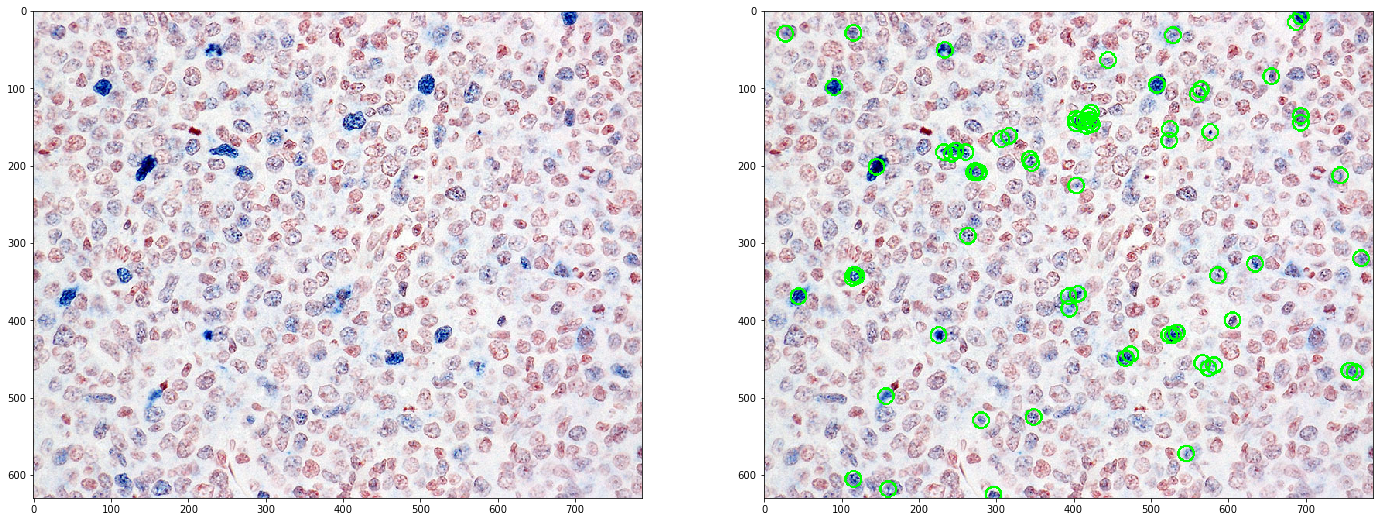

In [28]:
file_name = 'TP53 DLBCL 380 C3 neg 3.jpg'

image = cv2.imread(file_name)
im_cp = np.copy(image)
im_cp_labelled = np.copy(image)

for i in range(len(im_cp)):
    for j in range(len(im_cp[0])):
        r = im_cp[i][j][0]
        g = im_cp[i][j][1]
        b = im_cp[i][j][2]
        
        if r == 0 or float(b)/float(r) > 1.6:
            im_cp[i][j] = 255
        else:
            im_cp[i][j] = 0

ret, mask = cv2.threshold(im_cp,10,255, cv2.THRESH_BINARY)

cnt, heirarchy= cv2.findContours(cv2.cvtColor(im_cp, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt_filtered = []

for c in cnt:
    area = cv2.contourArea(c)
    if area > 5:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        cv2.circle(im_cp_labelled, (cX, cY), 10, (0, 255, 0), 2)

cv2.imwrite(file_name.split('.')[0]+'_labelled.jpg', im_cp_labelled)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(24,9)
ax[0].imshow(image)
ax[1].imshow(im_cp_labelled)

plt.show()

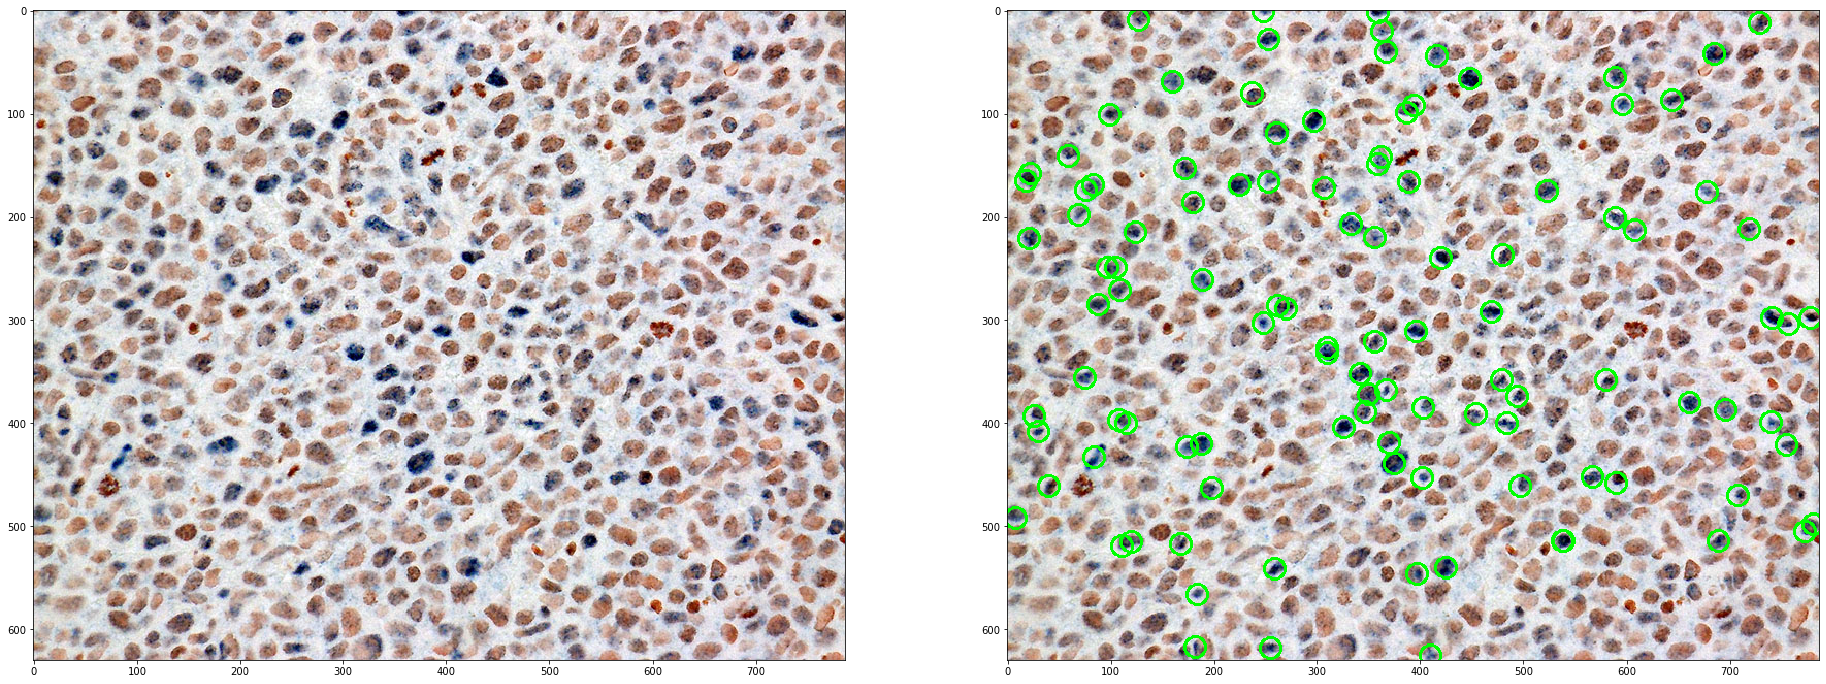

In [52]:
file_name = 'TP53 DLBCL 380 neg 2.jpg'

image = cv2.imread(file_name)
im_cp = np.copy(image)
im_cp_labelled = np.copy(image)

for i in range(len(im_cp)):
    for j in range(len(im_cp[0])):
        r = im_cp[i][j][0]
        g = im_cp[i][j][1]
        b = im_cp[i][j][2]
        
        if r == 0 or float(b)/float(r) > 1.6:
            im_cp[i][j] = 255
        else:
            im_cp[i][j] = 0

ret, mask = cv2.threshold(im_cp,10,255, cv2.THRESH_BINARY)

cnt, heirarchy= cv2.findContours(cv2.cvtColor(im_cp, cv2.COLOR_BGR2GRAY), cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cnt_filtered = []

for c in cnt:
    area = cv2.contourArea(c)
    if area > 5:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        cv2.circle(im_cp_labelled, (cX, cY), 10, (0, 255, 0), 2)

cv2.imwrite(file_name.split('.')[0]+'_labelled.jpg', im_cp_labelled)

fig,ax = plt.subplots(1,2)
fig.set_size_inches(32,12)
ax[0].imshow(image)
ax[1].imshow(im_cp_labelled)

plt.show()



In [7]:
from sklearn.cluster import KMeans

In [66]:
#im_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

im_resize = image.reshape(image.shape[0]*image.shape[1],image.shape[2])

km = KMeans(n_clusters=3, random_state=0).fit(im_resize)
im_km = km.cluster_centers_[km.labels_]

#im_show = im_km.reshape(image.shape[0], image.shape[1], image.shape[2])
#im_show = im_show.astype(int) #kmeans outputs floats
im_show = np.copy(image)
masks =  [np.zeros([image.shape[0],image.shape[1]]) for i in range(3)]

labels = km.labels_.reshape(image.shape[0], image.shape[1])

colors = np.asarray([[0,0,255.0],[0,255.0/2,255.0],[255.0,0,0]])
for k in range(3):
    ind = np.where(labels == k+1)
    
    im_show[ind] = colors[k]
    masks[k][ind]=1

alpha = 0.7
proc_image = np.copy(image)
proc_image = cv2.addWeighted(im_show, alpha, proc_image, 1-alpha,0,proc_image)
cv2.imwrite(file_name.split('.')[0]+'_clusters.jpg', im_show)

True

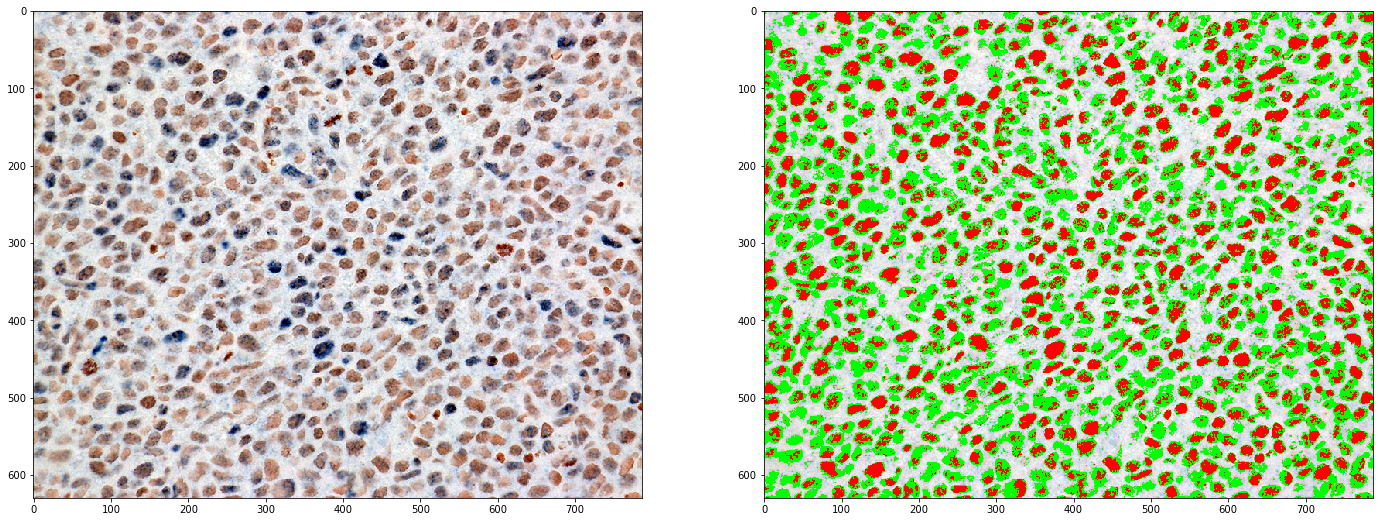

In [54]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(24,10)
ax[0].imshow(image)
ax[1].imshow(im_show)
plt.show()

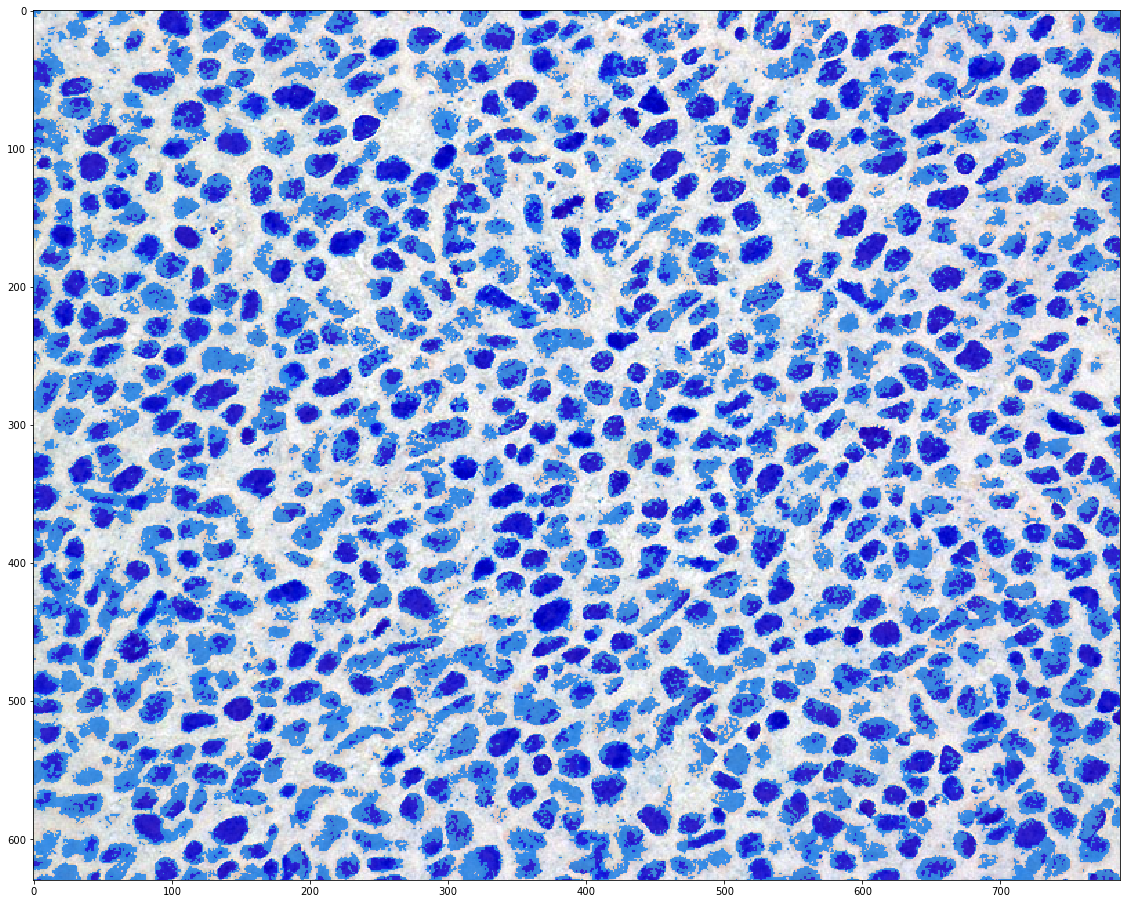

In [65]:
fig,ax = plt.subplots()
fig.set_size_inches(24,16)
ax.imshow(proc_image)

In [39]:
np.zeros([2,2])

array([[0., 0.],
       [0., 0.]])